# __Webscraping with Python: Images__

This notebook, will help you to scrape images from the web with Python.

__Source:__
- [Image scraping with python](https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d)

__Python Packages:__
- [selenium]()
- [requests]()
- [pillow]()


__Learning Objectives:__
- Be aware of the legal and ethical aspects of webscraping.
- Run Python code to scrape the web for images. 

![Alt Text](https://media3.giphy.com/media/zMukICnMEZmSf8zvXd/giphy.gif?cid=ecf05e4726tpkumd8nz41qzwus9e4axyn29i9zh2zvqawvjm&rid=giphy.gif&ct=g) 


### __1. Virtual Environment & Google Colaboratory (Optional)__ 

__Step 1:__ Open the Anaconda prompt.

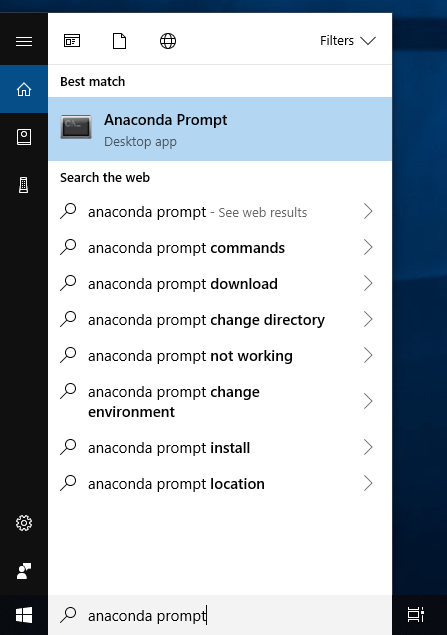

__Step 2:__ Create, and activate an Anaconda environment by copy/pasting the following piece of code into the prompt:

In [ ]:
conda create -n webscraping python=3.8 
conda activate webscraping

__Step 3:__ Install the neccesary packages in your ennvironment. For example: 

In [ ]:
conda install pandas

__Step 4:__ Create a Google Colaboratory account via: https://colab.research.google.com. 

__Step 5:__ Open this notebook in Google Colaboratory, and select 'GPU' as a runtime.

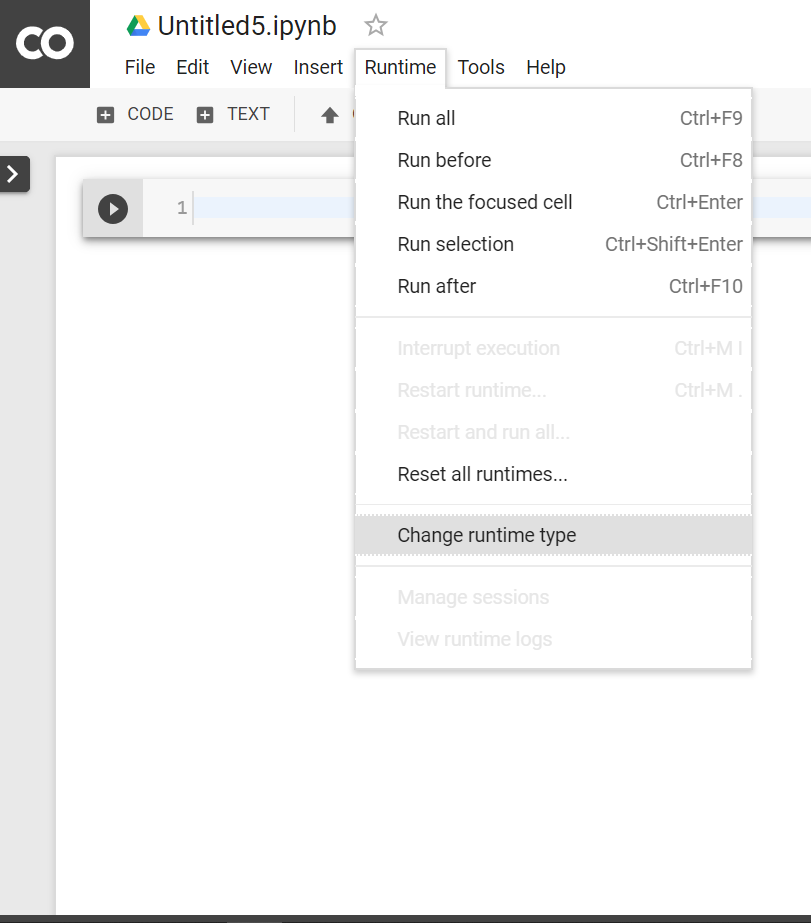

__Step 5:__ Follow Google's tutorial to connect your Colab notebook to a local GPU runtime: https://research.google.com/colaboratory/local-runtimes.html 

### __2. Webscraping__ 

__Step 1:__ Set your working directory.

In [ ]:
# Add your code

__Step 2:__ Run the code block below:

In [ ]:
import hashlib
from PIL import Image
import io, os
import requests
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.hk/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception as e:
                print(e)
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            #return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

def search_and_download(search_term, driver_path, target_path, number_images):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)

    for elem in res:
        persist_image(target_folder,elem)

__Step 3:__ Set the ```search_term```, ```target_path```, and ```number_images``` variables. 

In [ ]:
search_term = '天安门广场' # Geographical bias
target_path = './webscraping_images'
number_images = 5

search_and_download(
    search_term=search_term,
    driver_path=ChromeDriverManager().install(),
    target_path=target_path,
    number_images=number_images,
)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\blerck.i\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


Found: 100 search results. Extracting links from 0:100


KeyboardInterrupt: ignored

In [ ]:
import hashlib
from PIL import Image
import io, os
import requests
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception as e:
                print(e)
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            #return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

def search_and_download(search_term, driver_path, target_path, number_images):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)

    for elem in res:
        persist_image(target_folder,elem)

In [ ]:
search_term = 'tiananmen square' # Geographical bias
target_path = './webscraping_images'
number_images = 5

search_and_download(
    search_term=search_term,
    driver_path=ChromeDriverManager().install(),
    target_path=target_path,
    number_images=number_images,
)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\blerck.i\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


Found: 100 search results. Extracting links from 0:100


KeyboardInterrupt: ignored

## __The End__

![Alt Text](https://media0.giphy.com/media/27Y1W0GCKQtDq/giphy.gif) 
